In [1]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

In [2]:
corredores = pandas.read_csv("Corredores.csv")

corredores.head()

,Pais,Corredor,Lugar,Genero,Edad,Tiempo
0,GBR,3475,3592,Male,52,217.483333
1,NY,13594,13853,Female,40,272.550000
2,FRA,12012,12256,Male,31,265.283333
3,MI,10236,10457,Female,33,256.150000
4,NY,9476,9686,Male,33,252.250000


In [3]:
Q1 = corredores["Edad"].quantile(0.25)
Q3 = corredores["Edad"].quantile(0.75)

IQR = Q3 - Q1

inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR

corredores.loc[(corredores["Edad"] < inf) & (corredores["Edad"] > sup), :]

,Pais,Corredor,Lugar,Genero,Edad,Tiempo


# Muestreo aleatorio

In [6]:
resultados = numpy.array([6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6])

## Pruebas de hipótesis

* $H_0$ - El dado es justo $P(i) = \frac{1}{6}$
* $H_1$ - El dado está alterado

Estadístico

$$
T = \sum_{1}^{12} 1(x_i = 6)
$$

In [8]:
observaciones_6 = (resultados == 6).sum()

observaciones_6

np.int64(10)

In [11]:
caras = numpy.arange(1, 7)
simulaciones = 10_000
conteos_6 = numpy.zeros(simulaciones)

for i in range(simulaciones):
    tirada = numpy.random.choice(caras, size=12, replace=True)
    conteos_6[i] = (tirada == 6).sum()

pandas.Series(conteos_6).head()

0    1.0
1    1.0
2    3.0
3    2.0
4    2.0
dtype: float64

In [12]:
conteos_6.max()

np.float64(7.0)

## P-Valor

$$
p-valor = P(T \ge T_{obs} | H_0)
$$

$$
p-valor = \frac{| simulaciones (T \ge T_{obs}) |}{|simulaciones|}
$$

In [15]:
p_valor = (conteos_6 > observaciones_6).sum() / simulaciones

p_valor

np.float64(0.0)

# Permutaciones

In [16]:
equipos = pandas.read_csv("lista_equipos.txt", sep="\t")

equipos.head()

,RENGLON,MATRICULA,NOMBRE,Unnamed: 3
0,1,22130431,ALBAÑIL PALAFOX MARCELINO ANDRES,NaN
1,2,22230116,ALVARADO GARCIA PRIMO RAFAEL,NaN
2,3,21830530,CANO PAPADAKIS GABRIELA,NaN
3,4,21830107,CARMONA VALENCIA PONCIANO,NaN
4,5,22130096,CASTAÑEDA VELASCO JUAN PABLO,NaN


In [17]:
estudiantes = equipos["NOMBRE"]

estudiantes.head()

0    ALBAÑIL PALAFOX MARCELINO ANDRES 
1        ALVARADO GARCIA PRIMO RAFAEL 
2             CANO PAPADAKIS GABRIELA 
3           CARMONA VALENCIA PONCIANO 
4        CASTAÑEDA VELASCO JUAN PABLO 
Name: NOMBRE, dtype: object

Formaremos 6 equipos de 7

In [21]:
esudiantes_permutados = numpy.random.permutation(estudiantes)

grupos = pandas.DataFrame(esudiantes_permutados.reshape(6, 7))

grupos.index = [f"Equipo {i + 1}" for i in range(6)]
grupos.columns = [f"Jugador {i + 1}" for i in range(7)]

grupos

,Jugador 1,Jugador 2,Jugador 3,Jugador 4,Jugador 5,Jugador 6,Jugador 7
Equipo 1,MARTINEZ VALLADARES BRYAN ADAN,MARTINEZ SEIN EDUARDO DAVID,ALBAÑIL PALAFOX MARCELINO ANDRES,SILVA RODRIGUEZ EDGAR,CANO PAPADAKIS GABRIELA,LOPEZ ROCHA LUIS ANDRES,ALVARADO GARCIA PRIMO RAFAEL
Equipo 2,VEGA LOPEZ VICTOR HUGO,HERNANDEZ NICOLAS EDGAR DANIEL,CRESCENCIO HERNANDEZ ALEJANDRO,ZAVALA NORIEGA ALDO YAIR,CONTRERAS RAMIREZ MISAEL DE JESUS,CASTAÑEDA VELASCO JUAN PABLO,MEDINA GARCIA ARANZAZU
Equipo 3,LUCERO GUTIERREZ LUIS MANUEL,HERNANDEZ BADILLO GABRIELA GUADALUPE,GONZALEZ RAMIREZ HUGO ZAIR,DAVILA SANTAELLA LUIS,ROMERO TORRES AMERICA ALEXANDRA,MUÑOZ ROA CARLOS ALBERTO,VERGARA MONTES ADULFO EMILIANO
Equipo 4,QUINTERO HERNANDEZ CESAR EDUARDO,HERRERA CANALES EDITH ISABEL,PACHECO BASURTO RUBI ESMERALDA,PEREZ LEON VICTOR,SALINAS PEREZ DIANA MICHELLE,PENSADO ALARCON CESAR,LUNA AMADOR IVAN
Equipo 5,CRUZ AGUILAR ISAI,VELASQUEZ SARMIENTO MARIA GUADALUPE,RAMIREZ GARCIA MARCO ANTONIO,RIOS PAREDES ISAY,PEREZ DIAZ ALDO KRISTOFER,PEREZ VICTORIA JOSUE EDUARDO,ZAMORA VELAZQUEZ JOSE DE JESUS
Equipo 6,MARQUEZ RAMIREZ GERARDO,LOBATO SANTOS ROBERTO CARLOS,ZEPEDA GOMEZ KARLA MAGALI,CARMONA VALENCIA PONCIANO,MUÑOZ ALVAREZ RAFAEL TADEO,MORALES FARFAN LUIS ANTONIO,SANCHEZ ROMERO CARLOS ISAIAS


# Variables indicadoras (dummies)

In [34]:
corredores = pandas.read_csv("Corredores.csv", usecols=["Pais", "Corredor"], nrows=15)

corredores.head(15)

,Pais,Corredor
0,GBR,3475
1,NY,13594
2,FRA,12012
3,MI,10236
4,NY,9476
5,NJ,1720
6,CA,15736
7,GBR,10580
8,NED,11957
9,B.C,18933


In [35]:
corredores["Pais"].unique(), len(corredores["Pais"].unique())

(array(['GBR', 'NY', 'FRA', 'MI', 'NJ', 'CA', 'NED', 'B.C', 'ITA', 'GER'],
       dtype=object),
 10)

In [ ]:
(pandas.get_dummies(corredores["Pais"], dtype=int)

,B.C,CA,FRA,GBR,GER,ITA,MI,NED,NJ,NY
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0


In [ ]:
pandas.get_dummies(corredores["Pais"], dtype=int).sum()

B.C    1
CA     1
FRA    1
GBR    3
GER    1
ITA    1
MI     1
NED    1
NJ     1
NY     4
dtype: int64

<Axes: >

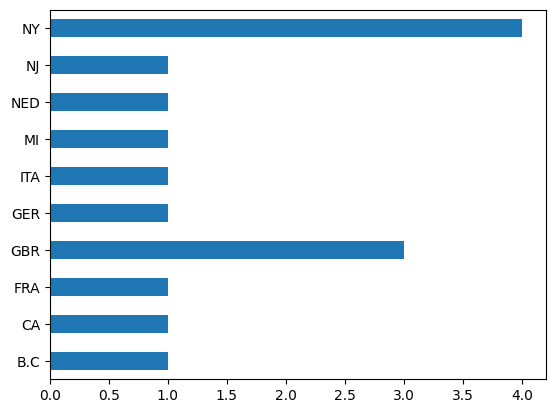

In [41]:
pandas.get_dummies(corredores["Pais"], dtype=int).sum().plot.barh()

## Análisis de las películas

In [107]:
movies = pandas.read_csv("movies.csv", index_col=0)

movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [108]:
dummies = movies["genres"].str.get_dummies(sep="|")

dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
dummies.sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

<Axes: >

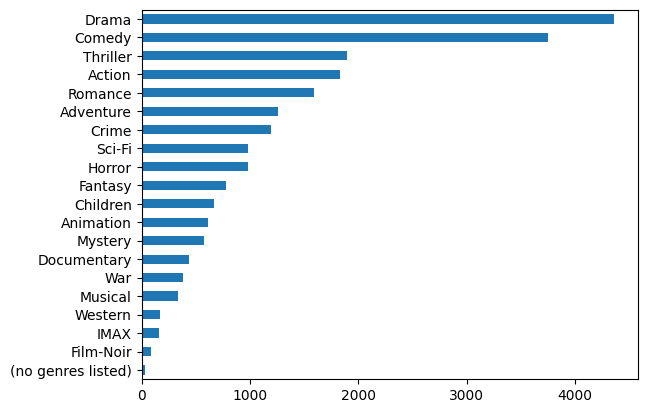

In [110]:
dummies.sum().sort_values().plot.barh()

In [111]:
dummies.add_prefix("Genre_")

,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
movies_ind = movies[["title"]].join(dummies.add_prefix("Genre_"))

movies_ind

,title,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,...,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193585,Flint (2017),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
movies_ind.iloc[7]

title                       Tom and Huck (1995)
Genre_(no genres listed)                      0
Genre_Action                                  0
Genre_Adventure                               1
Genre_Animation                               0
Genre_Children                                1
Genre_Comedy                                  0
Genre_Crime                                   0
Genre_Documentary                             0
Genre_Drama                                   0
Genre_Fantasy                                 0
Genre_Film-Noir                               0
Genre_Horror                                  0
Genre_IMAX                                    0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Romance                                 0
Genre_Sci-Fi                                  0
Genre_Thriller                                0
Genre_War                                     0
Genre_Western                           

In [114]:
import re

In [115]:
m = re.search("\\((\\d{4})\\)", movies["title"].iloc[0])

m

<re.Match object; span=(10, 16), match='(1995)'>

In [116]:
m.group(1)

'1995'

In [117]:
def extract_year(title):
    m = re.search("\\((\\d{4})\\)", title)
    if not m is None:
        return int(m.group(1))
    return numpy.nan

movies["year"] = movies["title"].map(extract_year).astype("Int64")

movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [137]:
movies["decade"] = ((movies["year"] // 10) * 10).astype("Int64")

movies.head()

,title,genres,year,decade
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990
2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990
3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990
5,Father of the Bride Part II (1995),Comedy,1995,1990


In [144]:
movies_decades = pandas.DataFrame()

movies_decades["total"] = movies["decade"].value_counts().sort_values(ascending=False)

movies_decades

,total
decade,
2000,2849
1990,2212
2010,1931
1980,1177
1970,500
1960,401
1950,279
1940,197
1930,136


## Paletas de colores

In [145]:
colores = seaborn.color_palette("viridis", movies_decades.index.size)

colores

[(0.283091, 0.110553, 0.431554),
 (0.271828, 0.209303, 0.504434),
 (0.239346, 0.300855, 0.540844),
 (0.203063, 0.379716, 0.553925),
 (0.169646, 0.456262, 0.55803),
 (0.140536, 0.530132, 0.555659),
 (0.120092, 0.600104, 0.54253),
 (0.146616, 0.67305, 0.508936),
 (0.252899, 0.742211, 0.448284),
 (0.404001, 0.800275, 0.362552),
 (0.595839, 0.848717, 0.243329),
 (0.804182, 0.882046, 0.114965)]

<Axes: ylabel='total'>

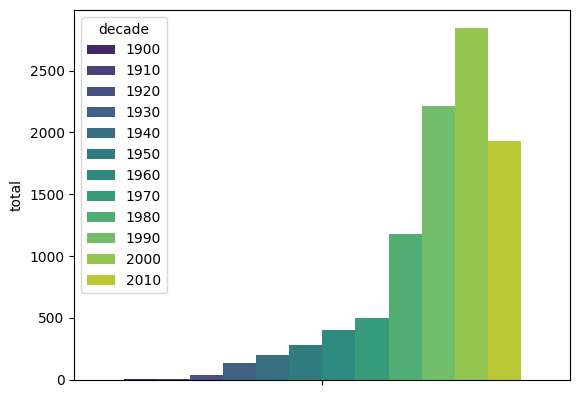

In [150]:
seaborn.barplot(movies_decades, y="total", palette=colores, hue=movies_decades.index)